In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
pd.set_option("display.max_rows", 120)

dados_treino = pd.read_csv(
    "/home/pinguim/Documentos/MeusEstudos/QuarentenaDados/DADOS_TREINO.csv")
dados_teste = pd.read_csv(
    "/home/pinguim/Documentos/MeusEstudos/QuarentenaDados/DADOS_TESTE.csv")
dados_desafioqt = pd.read_csv(
    "/home/pinguim/Documentos/MeusEstudos/QuarentenaDados/DESAFIOQT.csv")

assert dados_treino.shape == (150000, 5)
assert dados_teste.shape == (20000, 5)
assert dados_desafioqt.shape == (10000, 5)

coluna_label = 'NU_NOTA_LC'
coluna_features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

X_treino = dados_treino[coluna_features].to_numpy()
Y_treino = dados_treino[coluna_label].to_numpy()
X_teste = dados_teste[coluna_features].to_numpy()
Y_teste = dados_teste[coluna_label].to_numpy()

In [2]:
dados_treino.corr()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
NU_NOTA_CN,1.000000,0.568969,0.594625,0.580603,0.513613
NU_NOTA_CH,0.568969,1.000000,0.701125,0.531336,0.508316
NU_NOTA_LC,0.594625,0.701125,1.000000,0.567226,0.560623
NU_NOTA_MT,0.580603,0.531336,0.567226,1.000000,0.489896
NU_NOTA_REDACAO,0.513613,0.508316,0.560623,0.489896,1.000000


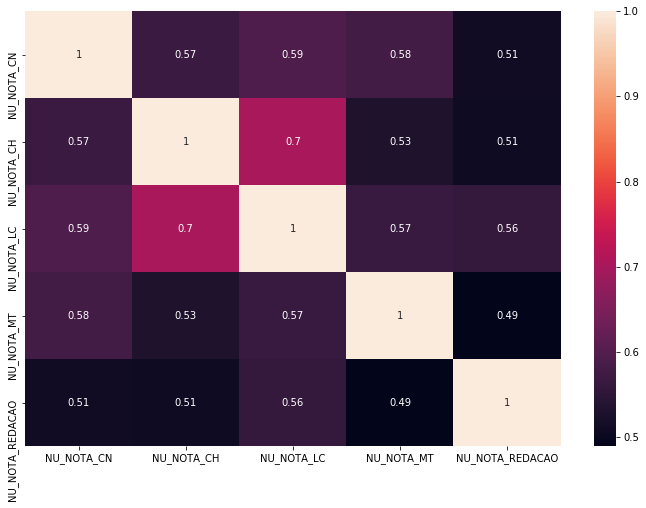

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
corr = dados_treino.corr()
ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr,  annot=True, annot_kws={"size": 10})

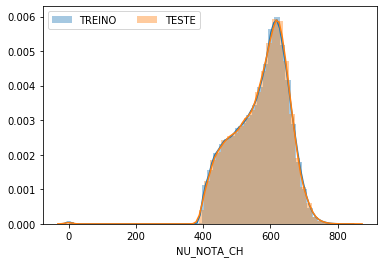

In [4]:
x0 = dados_treino['NU_NOTA_CH']
x1 = dados_teste['NU_NOTA_CH']
sns.distplot(x0)
sns.distplot(x1)
plt.legend(labels=['TREINO','TESTE'], ncol=2, loc='upper left')

In [2]:
coluna_label = 'NU_NOTA_LC'
coluna_features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

X_treino = dados_treino[coluna_features].to_numpy()
Y_treino = dados_treino[coluna_label].to_numpy()
X_teste = dados_teste[coluna_features].to_numpy()
Y_teste = dados_teste[coluna_label].to_numpy()

In [4]:
# Exemplo de classificação com Dummy
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error

modelo_dummy = DummyRegressor()
modelo_dummy.fit(X_treino, Y_treino)
dummy_predicoes = modelo_dummy.predict(X_teste)

avaliacao_dummy = mean_squared_error(Y_teste, dummy_predicoes)

print(f"Minha avaliação nos dados de teste foi de {avaliacao_dummy}")

Minha avaliação nos dados de teste foi de 5219.286870186777


In [3]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler() 
X_treino = sc.fit_transform(X_treino)  
X_teste = sc.transform(X_teste, copy=True)


In [10]:
from sklearn.ensemble import RandomForestRegressor
modelo_rf = RandomForestRegressor(
    criterion='mse',
    max_depth=10,
    max_features=4,
    max_leaf_nodes=None,
    min_impurity_split=None,
    min_samples_leaf=2,
    min_samples_split=6,
    min_weight_fraction_leaf=0.0,
    ccp_alpha=0.008,
    max_samples=0.5,    
    n_estimators=500,
    n_jobs=1,
    random_state=0,
    verbose=0,
    warm_start=False
)

In [11]:
modelo_rf.fit(X_treino, Y_treino)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.008, criterion='mse',
                      max_depth=10, max_features=4, max_leaf_nodes=None,
                      max_samples=0.5, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [12]:
y_pred_teste = modelo_rf.predict(X_teste)
y_pred_train = modelo_rf.predict(X_treino)

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('MAE:', mean_absolute_error(Y_treino, y_pred_train).round(2)  )
print('MSE:', mean_squared_error(Y_treino, y_pred_train).round(2) )  
print('RMSE:', np.sqrt(mean_squared_error(Y_treino, y_pred_train)).round(2))

MAE: 33.76
MSE: 1897.05
RMSE: 43.56


In [14]:
mean_squared_error(Y_teste, y_pred_teste).round(2)

2055.1

In [15]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(modelo_rf, X_teste, Y_teste, cv = 10))
mean_squared_error(Y_teste, y_pred_teste)

[0.60020551 0.58986199 0.58455764 0.60792986 0.59523245 0.59938707
 0.60859268 0.59084877 0.60204954 0.6190507 ]


2055.1039361831613

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

modelo_gbr = GradientBoostingRegressor(
    criterion='friedman_mse',
    alpha=0.5,
    n_estimators=200,
    learning_rate=0.2335589533,
    max_depth=2,    
    random_state=0,    
    loss='ls',
)

In [65]:
modelo_gbr.fit(X_treino, Y_treino)

GradientBoostingRegressor(alpha=0.5, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.2335589533, loss='ls',
                          max_depth=2, max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=0, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [66]:
y_pred_train_1 = modelo_gbr.predict(X_treino)
y_pred_teste_1 = modelo_gbr.predict(X_teste)

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('MAE:', mean_absolute_error(Y_treino, y_pred_train_1).round(2)  )
print('MSE:', mean_squared_error(Y_treino, y_pred_train_1).round(2) )  
print('RMSE:', np.sqrt(mean_squared_error(Y_treino, y_pred_train_1)).round(2))

MAE: 34.53
MSE: 1994.85
RMSE: 44.66


In [68]:
mean_squared_error(Y_teste, y_pred_teste_1).round(2)

2043.55

In [69]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(modelo_gbr, X_teste, Y_teste, cv = 5))
mean_squared_error(Y_teste, y_pred_teste_1)

[0.59511186 0.58990903 0.58789002 0.59613577 0.60219365]


2043.551324253954

In [23]:
from sklearn.ensemble import RandomForestRegressor
modelo_rf_1 = RandomForestRegressor(
    ccp_alpha=0.0,
    criterion='mse',
    max_depth=10,
    max_features=3,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    min_samples_leaf=2,
    min_samples_split=4,
    min_weight_fraction_leaf=0.0,
    n_estimators=2000,
    n_jobs=1,
    random_state=2,
    verbose=0,
    warm_start=False
)

In [24]:
modelo_rf_1.fit(X_treino, Y_treino)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=2000, n_jobs=1, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

In [25]:
y_pred_teste_2 = modelo_rf_1.predict(X_teste)
y_pred_train_2 = modelo_rf_1.predict(X_treino)

In [26]:
print('MAE:', mean_absolute_error(Y_treino, y_pred_train_2).round(2)  )
print('MSE:', mean_squared_error(Y_treino, y_pred_train_2).round(2) )  
print('RMSE:', np.sqrt(mean_squared_error(Y_treino, y_pred_train_2)).round(2))

MAE: 33.68
MSE: 1882.57
RMSE: 43.39


In [27]:
mean_squared_error(Y_teste, y_pred_teste_2).round(2)

2056.64

In [138]:
from sklearn.ensemble import ExtraTreesRegressor
modelo_etr = ExtraTreesRegressor(
    n_estimators=25,
    max_features=0.28,
    max_samples=2,
    max_depth=15,
    min_samples_split=2,
    random_state=0)

In [139]:
modelo_etr.fit(X_treino, Y_treino)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=15, max_features=0.28, max_leaf_nodes=None,
                    max_samples=2, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=25, n_jobs=None, oob_score=False,
                    random_state=0, verbose=0, warm_start=False)

In [140]:
y_pred_teste_3 = modelo_etr.predict(X_teste)
y_pred_train_3 = modelo_etr.predict(X_treino)

In [141]:
print('MAE:', mean_absolute_error(Y_treino, y_pred_train_3).round(2)  )
print('MSE:', mean_squared_error(Y_treino, y_pred_train_3).round(2) )  
print('RMSE:', np.sqrt(mean_squared_error(Y_treino, y_pred_train_3)).round(2))

MAE: 35.53
MSE: 2054.29
RMSE: 45.32


In [142]:
mean_squared_error(Y_teste, y_pred_teste_3).round(2)

2195.11

In [64]:
from sklearn.svm import LinearSVR
modelo_svr = LinearSVR(C=1.0, dual=True, epsilon=0.0,
                       max_iter=2000, random_state=0)

In [65]:
modelo_svr.fit(X_treino, Y_treino)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=2000,
          random_state=0, tol=0.0001, verbose=0)

In [66]:
y_pred_teste_4 = modelo_svr.predict(X_teste)
y_pred_train_4 = modelo_svr.predict(X_treino)

In [67]:
print('MAE:', mean_absolute_error(Y_treino, y_pred_train_4).round(2)  )
print('MSE:', mean_squared_error(Y_treino, y_pred_train_4).round(2) )  
print('RMSE:', np.sqrt(mean_squared_error(Y_treino, y_pred_train_4)).round(2))

MAE: 35.78
MSE: 2158.83
RMSE: 46.46


In [68]:
mean_squared_error(Y_teste, y_pred_teste_4).round(2)

2193.91